In [1]:
using PyPlot
using DifferentialEquations

In [2]:
include("../rms/Parse.jl")
include("../rms/Reactor.jl")

In [3]:
outDict = readinput("testing/superminimal.yml")

┌ Warning: assuming values for Species,index are in SI units
└ @ Main /Users/mattjohnson/RMGCODE/RMS/rms/Parse.jl:90
┌ Warning: assuming values for Species,name are in SI units
└ @ Main /Users/mattjohnson/RMGCODE/RMS/rms/Parse.jl:90
┌ Warning: assuming values for Species,smiles are in SI units
└ @ Main /Users/mattjohnson/RMGCODE/RMS/rms/Parse.jl:90
┌ Warning: assuming values for NASApolynomial,coefs are in SI units
└ @ Main /Users/mattjohnson/RMGCODE/RMS/rms/Parse.jl:90
┌ Warning: assuming values for NASApolynomial,Tmin are in SI units
└ @ Main /Users/mattjohnson/RMGCODE/RMS/rms/Parse.jl:90
┌ Warning: assuming values for NASApolynomial,Tmax are in SI units
└ @ Main /Users/mattjohnson/RMGCODE/RMS/rms/Parse.jl:90
┌ Warning: assuming values for NASApolynomial,coefs are in SI units
└ @ Main /Users/mattjohnson/RMGCODE/RMS/rms/Parse.jl:90
┌ Warning: assuming values for NASApolynomial,Tmin are in SI units
└ @ Main /Users/mattjohnson/RMGCODE/RMS/rms/Parse.jl:90
┌ Warning: assuming values for N

┌ Warning: assuming values for NASApolynomial,Tmin are in SI units
└ @ Main /Users/mattjohnson/RMGCODE/RMS/rms/Parse.jl:90
┌ Warning: assuming values for NASApolynomial,Tmax are in SI units
└ @ Main /Users/mattjohnson/RMGCODE/RMS/rms/Parse.jl:90
┌ Warning: assuming values for Species,index are in SI units
└ @ Main /Users/mattjohnson/RMGCODE/RMS/rms/Parse.jl:90
┌ Warning: assuming values for Species,name are in SI units
└ @ Main /Users/mattjohnson/RMGCODE/RMS/rms/Parse.jl:90
┌ Warning: assuming values for Species,smiles are in SI units
└ @ Main /Users/mattjohnson/RMGCODE/RMS/rms/Parse.jl:90
┌ Warning: assuming values for NASApolynomial,coefs are in SI units
└ @ Main /Users/mattjohnson/RMGCODE/RMS/rms/Parse.jl:90
┌ Warning: assuming values for NASApolynomial,Tmin are in SI units
└ @ Main /Users/mattjohnson/RMGCODE/RMS/rms/Parse.jl:90
┌ Warning: assuming values for NASApolynomial,Tmax are in SI units
└ @ Main /Users/mattjohnson/RMGCODE/RMS/rms/Parse.jl:90
┌ Warning: assuming values for NA

┌ Warning: assuming values for ElementaryReaction,reactants are in SI units
└ @ Main /Users/mattjohnson/RMGCODE/RMS/rms/Parse.jl:90
┌ Warning: assuming values for ElementaryReaction,products are in SI units
└ @ Main /Users/mattjohnson/RMGCODE/RMS/rms/Parse.jl:90
┌ Warning: assuming values for Arrhenius,Ea are in SI units
└ @ Main /Users/mattjohnson/RMGCODE/RMS/rms/Parse.jl:90
┌ Warning: assuming values for Arrhenius,A are in SI units
└ @ Main /Users/mattjohnson/RMGCODE/RMS/rms/Parse.jl:90
┌ Warning: assuming values for Arrhenius,n are in SI units
└ @ Main /Users/mattjohnson/RMGCODE/RMS/rms/Parse.jl:90
┌ Warning: assuming values for ElementaryReaction,reactantinds are in SI units
└ @ Main /Users/mattjohnson/RMGCODE/RMS/rms/Parse.jl:90
┌ Warning: assuming values for ElementaryReaction,productinds are in SI units
└ @ Main /Users/mattjohnson/RMGCODE/RMS/rms/Parse.jl:90
┌ Warning: assuming values for ElementaryReaction,index are in SI units
└ @ Main /Users/mattjohnson/RMGCODE/RMS/rms/Parse.

Dict{Any,Any} with 1 entry:
  "gas" => Dict{Any,Any}("Species"=>Species[Species{NASA{EmptyThermoUncertainty…

In [4]:
outDict

Dict{Any,Any} with 1 entry:
  "gas" => Dict{Any,Any}("Species"=>Species[Species{NASA{EmptyThermoUncertainty…

In [5]:
spcs = outDict["gas"]["Species"]
rxns = outDict["gas"]["Reactions"]

17-element Array{ElementaryReaction,1}:
 ElementaryReaction{Arrhenius{Float64,Float64,Float64,EmptyRateUncertainty},Species{NASA{EmptyThermoUncertainty},EmptyDiffusivity},Int64}
  index: Int64 1
  reactants: Array{Species{NASA{EmptyThermoUncertainty},EmptyDiffusivity}}((2,))
  reactantinds: Array{Int64}((2,)) [7, 7]
  products: Array{Species{NASA{EmptyThermoUncertainty},EmptyDiffusivity}}((1,))
  productinds: Array{Int64}((1,)) [5]
  kinetics: Arrhenius{Float64,Float64,Float64,EmptyRateUncertainty}
      
 ElementaryReaction{Arrhenius{Float64,Float64,Float64,EmptyRateUncertainty},Species{NASA{EmptyThermoUncertainty},EmptyDiffusivity},Int64}
  index: Int64 2
  reactants: Array{Species{NASA{EmptyThermoUncertainty},EmptyDiffusivity}}((2,))
  reactantinds: Array{Int64}((2,)) [6, 5]
  products: Array{Species{NASA{EmptyThermoUncertainty},EmptyDiffusivity}}((2,))
  productinds: Array{Int64}((2,)) [8, 7]
  kinetics: Arrhenius{Float64,Float64,Float64,EmptyRateUncertainty}
   
 ElementaryReactio

In [6]:
ig = IdealGas(spcs,rxns,name="gas")

IdealGas{ElementaryReaction}
  name: String "gas"
  species: Array{Species}((12,))
  reactions: Array{ElementaryReaction}((17,))
  spcdict: Dict{String,Int64}
  diffusionlimited: Bool false


In [7]:
ics = Dict(["T"=>1000.0,"P"=>1e5,"H2"=>0.67*100,"O2"=>0.33*100])

Dict{String,Float64} with 4 entries:
  "O2" => 33.0
  "T"  => 1000.0
  "P"  => 100000.0
  "H2" => 67.0

In [8]:
state = MolarState(ics,ig)

MolarState{Float64}
  ns: Array{Float64}((12,)) [0.0, 0.0, 0.0, 0.0, 67.0, 33.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  cs: Array{Float64}((12,)) [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  T: Float64 1000.0
  P: Float64 100000.0
  V: Float64 0.0
  C: Float64 0.0
  t: Float64 0.0
  N: Float64 0.0
  Gs: Array{Float64}((12,)) [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  Hs: Array{Float64}((12,)) [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  Us: Array{Float64}((12,)) [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  Ss: Array{Float64}((0,)) Float64[]
  Cps: Array{Float64}((0,)) Float64[]


In [9]:
state.ns,[sp.name for sp in ig.species]

([0.0, 0.0, 0.0, 0.0, 67.0, 33.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], ["Ar", "He", "Ne", "N2", "H2", "O2", "H", "[O]O", "OH(D)", "O(T)", "OO", "H2O"])

In [10]:
d = ConstantTPDomain(state=state,phase=ig)

ConstantTPDomain{MolarState{Float64},IdealGas{ElementaryReaction},Int64}
  state: MolarState{Float64}
  phase: IdealGas{ElementaryReaction}
  interfaces: Array{AbstractInterface}((0,))
  indexes: Array{Int64}((2,)) [1, 12]


In [11]:
using DifferentialEquations

In [12]:
react = BatchSingleDomainReactor(d,(0.0,141.0))

[25618.9, 0.000121142, 7.00871e7, 4608.21, 1.49536e7, 90952.4, 7.85e6, 318.875, 1.50221e8, 5.87478e-10, 12507.1, 1.0219e7, 1.0e7, 20446.7, 103.653, 1.59368e6, 2655.24]
[1.60583e16, 8.31752e-12, 1.33565e5, 51229.3, 3.13459e11, 2.34686e6, 461.379, 337.965, 5.42715e18, 2.46106e-14, 1.73137e7, 7.55708e7, 5.13424e16, 3.844e11, 3.19725, 1.63793e5, 0.0094603]
[1.59537e-12, 1.45647e7, 524.741, 0.0899526, 4.77052e-5, 0.0387549, 17014.2, 0.943512, 2.76796e-11, 23871.0, 0.000722382, 0.135224, 1.94771e-10, 5.31912e-8, 32.4194, 9.72982, 2.80672e5]
[0.0, 0.0, 0.0, 0.0, -0.0322161, -0.0322161, 0.0322161, 0.0322161, 0.0, 0.0, 0.0, 0.0]


BatchSingleDomainReactor{ConstantTPDomain{MolarState{Float64},IdealGas{ElementaryReaction},Int64}}(ConstantTPDomain{MolarState{Float64},IdealGas{ElementaryReaction},Int64}
  state: MolarState{Float64}
  phase: IdealGas{ElementaryReaction}
  interfaces: Array{AbstractInterface}((0,))
  indexes: Array{Int64}((2,)) [1, 12]
, ODEProblem with uType Array{Float64,1} and tType Float64. In-place: false
timespan: (0.0, 141.0)
u0: [0.0, 0.0, 0.0, 0.0, 67.0, 33.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [13]:
[length(r.reactantinds)-length(r.productinds) for r in ig.reactions]

17-element Array{Int64,1}:
 1
 0
 1
 0
 1
 0
 1
 0
 1
 0
 0
 1
 1
 0
 0
 0
 0

In [14]:
sol = solve(react.ode,CVODE_BDF(),abstol=1e-20,reltol=1e-12)

retcode: Success
Interpolation: 3rd order Hermite
t: 3901-element Array{Float64,1}:
   0.0                   
   9.858102033766656e-16 
   3.1168439057389604e-14
   1.2545833707728983e-13
   2.1974823509719006e-13
   3.140381331170903e-13 
   4.0832803113699055e-13
   6.069505493066735e-13 
   9.682905290737807e-13 
   1.610375053089872e-12 
   2.7744527024662048e-12
   5.618420765940128e-12 
   8.462388829414051e-12 
   ⋮                     
 136.79941451544312      
 137.11878987344204      
 137.43816523144096      
 137.75754058943988      
 138.0769159474388       
 138.39629130543773      
 138.71566666343665      
 139.03504202143557      
 139.52958660001394      
 140.0241311785923       
 140.51867575717068      
 141.0                   
u: 3901-element Array{Array{Float64,1},1}:
 [0.0, 0.0, 0.0, 0.0, 67.0, 33.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]                                                
 [0.0, 0.0, 0.0, 0.0, 67.0, 33.0, 3.17589e-17, 3.1759e-17, 4.23363e-33, 4.23363e-33, 

In [15]:
ts = exp.(range(log(1e-15),length=1000,stop=log(140.0)))

1000-element Array{Float64,1}:
   1.0000000000000013e-15
   1.0403112411904624e-15
   1.0822474785472312e-15
   1.125874217682717e-15 
   1.171259604821847e-15 
   1.2184745332484646e-15
   1.2675927540426688e-15
   1.3186909912821638e-15
   1.3718490618874274e-15
   1.427150000298069e-15 
   1.4846801881750512e-15
   1.5445294893312749e-15
   1.6067913901014763e-15
   ⋮                     
  90.64249078249406      
  94.29640209053109      
  98.097607098595        
 102.05204339855338      
 106.16588793397159      
 110.44556664867719      
 114.89776452426895      
 119.52943602225125      
 124.34781594710378      
 129.36043074725433      
 134.57511027160848      
 139.99999999999994      

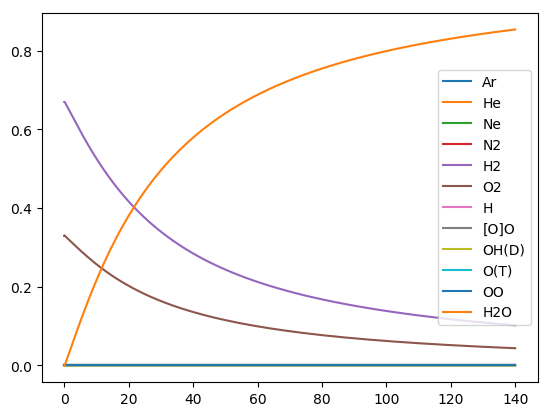

PyObject <matplotlib.legend.Legend object at 0x140ac8dd8>

In [16]:
plot(ts,[sol(t)./sum(sol(t)) for t in ts])
legend([sp.name for sp in ig.species])